In [17]:
from autograd import grad 
from autograd import numpy as np
from autograd import value_and_grad 
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import pandas as pd

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True 

In [18]:
df = pd.read_csv('ford_data.csv')
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1975-03-01,1.070527,1.248949,1.062417,1.204343,0.002020,48741400
1,1975-04-01,1.204343,1.244894,1.119188,1.167848,0.001958,29854600


### Example of Exponential Weighted Average

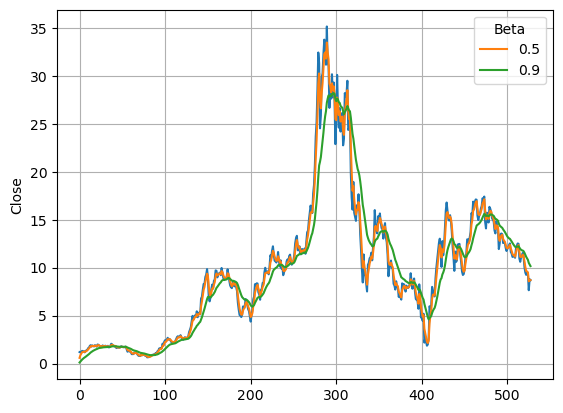

In [33]:
sns.lineplot(df['Close'])
x = np.array(df['Close'])

beta_arr = [0.5,0.9]
for beta in beta_arr:
    x_new = 0
    x_eav = [] 
    for idx in range(len(x)):
        x_new = x_new*beta + (1-beta)*x[idx]
        x_eav.append(x_new)

    sns.lineplot(x_eav, label=beta)
plt.legend(title='Beta')

### Impact of learning rate/step length

In [20]:
a1 = 0
b1 = np.sin(10)*np.ones((2,1))
C1 = np.array([[0.5,1],[0,9.75]])
g = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]

w = np.array([10.0,1.0]) # 2D initialization point
weight_1 = np.linspace(-1,10,100)
weight_2 = np.linspace(-1,1,100)


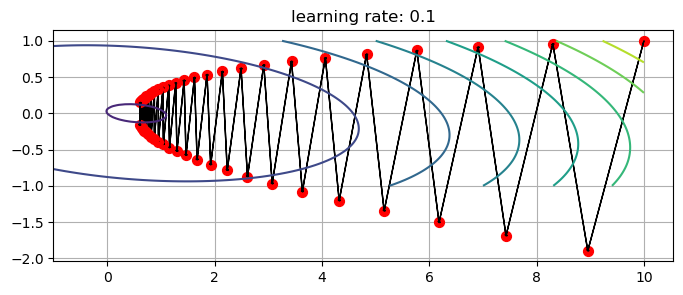

In [21]:
alpha = [0.1]
max_its = 50

for alpha_choice in alpha:
    weight_history,cost_history = utils.gradient_descent(g,alpha_choice,max_its,w)
    w1_vals, w2_vals, func_vals = utils.gen_plot_varaiables(weight_1,weight_2, g)
    utils.plot_contour_plots(w1_vals, w2_vals, weight_history, func_vals, alpha_choice)

[10.45597889 28.95597889]
[10.06185931 23.20500322]
[ 9.37448307 13.40353089]
[8.52806431 1.87477244]
[ 7.66225905 -8.95197143]
[  6.89593145 -17.02702908]
[  6.30754758 -21.0432696 ]
[  5.92535933 -20.61752398]
[  5.72831154 -16.27318934]
[ 5.65641731 -9.24729935]
[ 5.62762132 -1.17733917]
[5.55720211 6.25892993]
[ 5.3756635  11.67550875]
[ 5.04176703 14.21994885]
[ 4.54864305 13.68663725]
[ 3.92247866 10.49227611]
[3.21478317 5.53213246]
[ 2.49038806 -0.04291049]
[ 1.81395769 -5.07698548]
[ 1.23780064 -8.63578038]
[  0.79323909 -10.16709662]
[ 0.48687227 -9.57062979]
[ 0.30197971 -7.17240555]
[ 0.20428066 -3.61840445]
[0.15049275 0.28374259]
[0.09774128 3.73884021]
[0.01189915 6.1183768 ]
[-0.12666154  7.06675727]
[-0.32076711  6.54354864]
[-0.55768994  4.79987656]
[-0.81334235  2.30017266]
[-1.05829782 -0.3899611 ]
[-1.26427516 -2.72445609]
[-1.40976745 -4.28158989]
[-1.48379694 -4.83400261]
[-1.48724549 -4.37370558]
[-1.43173967 -3.0916932 ]
[-1.3365501 -1.3206845]
[-1.22430714  0.

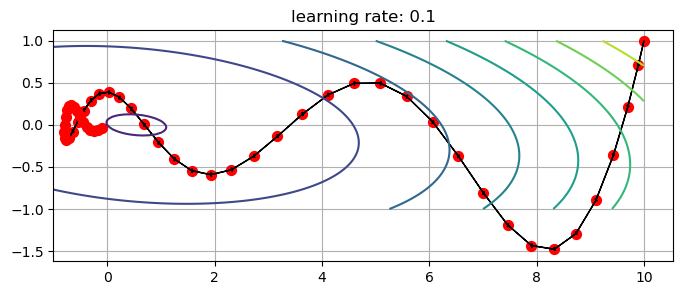

In [22]:
alpha = [0.1]
max_its = 50
beta= 0.9


for alpha_choice in alpha:
    weight_history,cost_history = utils.momentum(g,alpha_choice,max_its,w,beta)
    w1_vals, w2_vals, func_vals = utils.gen_plot_varaiables(weight_1,weight_2, g)
    utils.plot_contour_plots(w1_vals, w2_vals, weight_history, func_vals, alpha_choice)